In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy.cluster.hierarchy import linkage,dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import DBSCAN
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn.preprocessing import StandardScaler

In [11]:
data=pd.read_csv('wcd.csv')

In [12]:
print('Data First 5 Rows\n---------------------\n',data.head())

Data First 5 Rows
---------------------
    Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [13]:
print('Data Last 5 Rows\n---------------------\n',data.tail())

Data Last 5 Rows
---------------------
      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
435        2204  
436        2346  
437        1867  
438        2125  
439          52  


In [14]:
print('Data Show Describe\n---------------------\n',data.describe())

Data Show Describe
---------------------
           Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%

In [15]:
print('Data Show Info\n---------------------\n')
print(data.info())

Data Show Info
---------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [16]:
print('Data Show Columns\n-----------\n',data.columns)

Data Show Columns
-----------
 Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


In [17]:
print('Data Shape Show\n----------\n',data.shape)

Data Shape Show
----------
 (440, 8)


In [18]:
print('Data Sum of Null\n-------------------\n',data.isnull().sum())

Data Sum of Null
-------------------
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [19]:
indices=[22,154,398]
samples = pd.DataFrame(data.loc[indices], columns=data.keys()).reset_index(drop=True)
print('Chosen samples of wholesale customers dataset :')
samples

Chosen samples of wholesale customers dataset :


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,31276,1917,4469,9408,2381,4334
1,1,3,622,55,137,75,7,8
2,1,3,11442,1032,582,5390,74,247


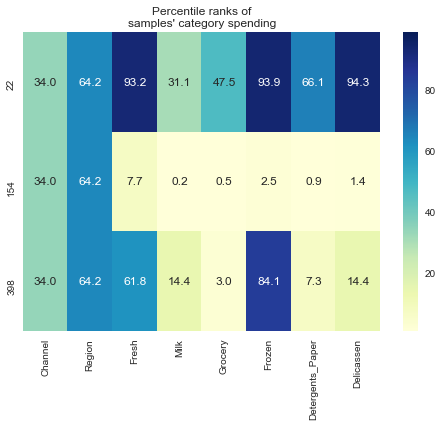

In [20]:
pcts=100.*data.rank(axis=0,pct=True).iloc[indices].round(decimals=3)
sns.heatmap(pcts,annot=True,vmin=1,vmax=99,fmt='.1f',cmap='YlGnBu')
plt.title('Percentile ranks of\nsamples\' category spending')
plt.xticks(rotation=90,ha='center')
plt.show()

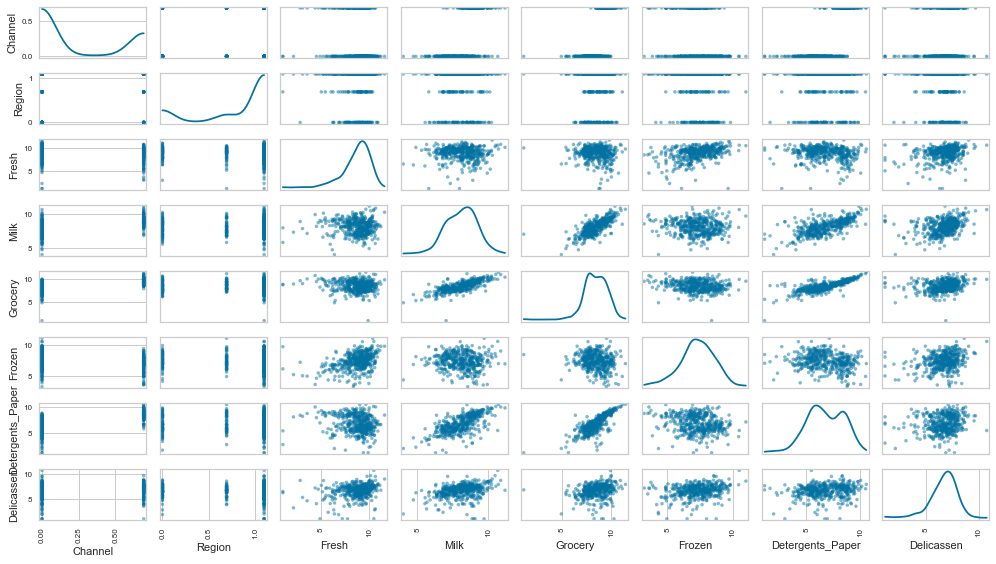

Data points considered outliers for the featureChannel:
      Channel    Region      Fresh      Milk    Grocery    Frozen  \
0    0.693147  1.098612   9.446913  9.175335   8.930759  5.365976   
1    0.693147  1.098612   8.861775  9.191158   9.166179  7.474205   
2    0.693147  1.098612   8.756682  9.083416   8.946896  7.785305   
3    0.000000  1.098612   9.492884  7.086738   8.347827  8.764678   
4    0.693147  1.098612  10.026369  8.596004   8.881558  8.272571   
..        ...       ...        ...       ...        ...       ...   
430  0.000000  1.098612  10.299003  9.396903   9.682030  9.483036   
431  0.000000  1.098612  10.577146  7.266129   6.638568  8.414052   
432  0.693147  1.098612   9.584040  9.647821  10.317020  6.079933   
433  0.000000  1.098612   9.238928  7.591357   7.710653  6.945051   
434  0.000000  1.098612   7.932721  7.437206   7.828038  4.174387   

     Detergents_Paper  Delicassen  
0            7.891331    7.198931  
1            8.099554    7.482119  
2      

In [22]:
log_data_v1=np.log(data.copy())
log_samples=np.log(samples)

pd.plotting.scatter_matrix(log_data_v1,alpha=0.5,figsize=(14,8),diagonal='kde')
plt.tight_layout()
plt.show()
for feature in log_data_v1.keys():
    Q1=np.percentile(log_data_v1,25)
    Q3=np.percentile(log_data_v1,75)
    step=(Q3-Q1)*1.5
    print('Data points considered outliers for the feature{}:'.format(feature))
    log_data_v1[~((log_data_v1[feature]>=Q1-step)&(log_data_v1[feature]<=Q3+step))]
    outliers=[66,75,338,154,289]
    good_data=log_data_v1.drop(log_data_v1.index[outliers]).reset_index(drop=True)
    print(good_data)

In [23]:
pca = PCA(n_components=6)
pca.fit(good_data)

pca_samples=pca.transform(log_samples)

In [24]:
print(pca.components_)

[[-0.1159825  -0.0076835   0.21168209 -0.38858142 -0.43369376  0.20343588
  -0.73951751 -0.11967296]
 [-0.00365409  0.00471809 -0.64089176 -0.17872361 -0.10522011 -0.5100665
  -0.08210192 -0.52848859]
 [-0.02383926 -0.01026429 -0.59725002  0.01998705 -0.06782837  0.01520161
  -0.25602805  0.75619913]
 [ 0.0022793   0.04026146  0.43256056 -0.03296158 -0.01252927 -0.83303731
  -0.13226153  0.31397049]
 [-0.01215859  0.02320359 -0.01361395  0.73524508  0.3317342  -0.02266706
  -0.55873065 -0.18921359]
 [ 0.03349085 -0.17467815 -0.0037424  -0.5125995   0.81380671  0.03487527
  -0.20480831  0.01222958]]


In [25]:
print(pca.explained_variance_)

[4.60468724 2.78013216 1.17499049 1.01947182 0.50392499 0.20013469]


In [26]:
pca_samples

array([[ 0.08735708, -2.81263766,  0.10295603, -0.41695188, -1.3581377 ,
         0.08366604],
       [ 6.23064634,  6.9694162 , -0.73291393,  0.86884713, -0.51423527,
         0.0310041 ],
       [ 3.79574513,  0.24013279, -0.45672886, -0.78232432,  0.01818639,
        -0.59757009]])

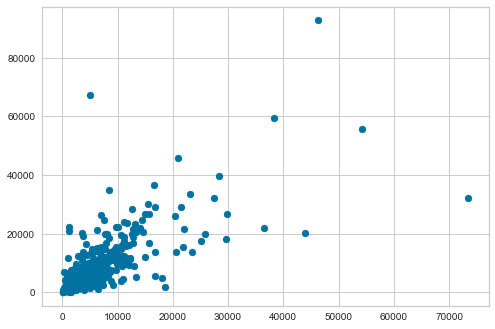

In [27]:
plt.scatter(x=data['Milk'],y=data['Grocery'])
plt.show()

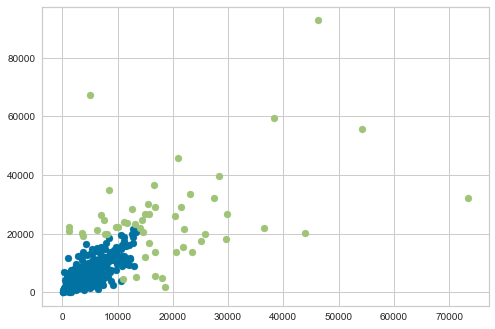

In [31]:
temp=data[['Milk','Grocery']]
# temp=temp.as_matrix().astype('float32',copy=False)
std_scaler=StandardScaler().fit(temp)
temp=std_scaler.transform(temp)
dbscan=DBSCAN(eps=0.5,min_samples=15).fit(temp)
core_samples=np.zeros_like(dbscan.labels_,dtype=bool)
core_samples[dbscan.core_sample_indices_]=True
x=pd.DataFrame(core_samples,columns=['cluster'])
ind=x.index[x['cluster']==True].tolist()
p1=data.iloc[ind,:]
p2=pd.concat([data,p1]).drop_duplicates(keep=False)
plt.scatter(x=p1['Milk'],y=p1['Grocery'])
plt.scatter(x=p2['Milk'],y=p2['Grocery'])
plt.show()

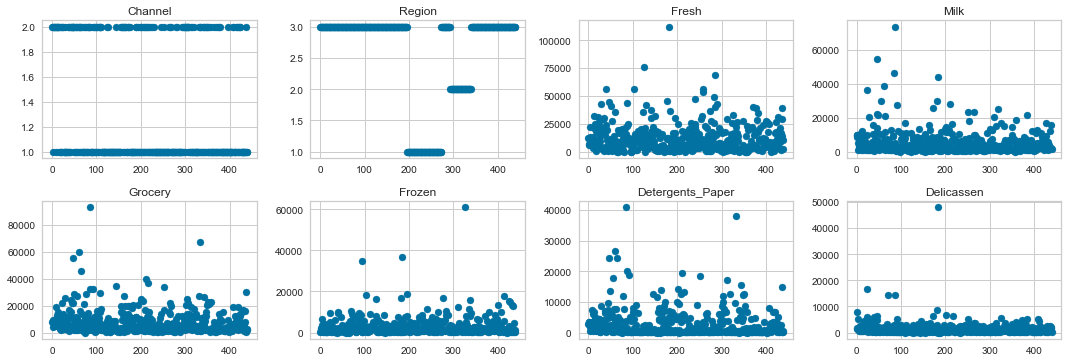

In [33]:
all_columns_values=data.columns.values
for i,col in enumerate(all_columns_values):
    plt.subplot(4,4,i+1)
    plt.scatter([i for i in range(440)],data[col].values.tolist())
    plt.title(col)
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(15,10)
    plt.tight_layout()
plt.show()

In [34]:
data=data.drop(labels=['Region','Channel'],axis=1)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [35]:
data.shape

(440, 6)

In [36]:
log_data=np.log(data)
good_data=log_data.drop([128,65,66,75,154])
print(good_data.head())

       Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0   9.446913  9.175335  8.930759  5.365976          7.891331    7.198931
1   8.861775  9.191158  9.166179  7.474205          8.099554    7.482119
2   8.756682  9.083416  8.946896  7.785305          8.165079    8.967504
3   9.492884  7.086738  8.347827  8.764678          6.228511    7.488853
4  10.026369  8.596004  8.881558  8.272571          7.482682    8.553525


In [37]:
pca=PCA().fit(good_data)
print(pca.explained_variance_ratio_)
print()
print(good_data.columns.values.tolist())
print(pca.components_)

[0.44302505 0.26379218 0.1230638  0.10120908 0.04850196 0.02040793]

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
[[ 0.16746374 -0.40143866 -0.43811142  0.17820975 -0.75142613 -0.14987105]
 [-0.68593522 -0.16722783 -0.07072902 -0.50054207 -0.04244398 -0.49414702]
 [-0.67738927  0.04020501 -0.01953317  0.31504299 -0.21170161  0.62855082]
 [-0.204293    0.01281068  0.05567564  0.78544905  0.20961368 -0.54233972]
 [-0.00261356  0.71923846  0.3553861  -0.0330861  -0.55815441 -0.20918629]
 [ 0.02915623 -0.54018269  0.82053348  0.02054106 -0.18238824  0.01974794]]


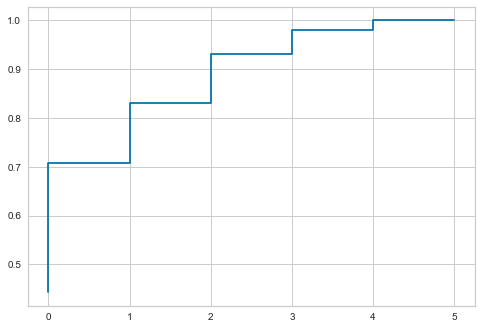

In [38]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()

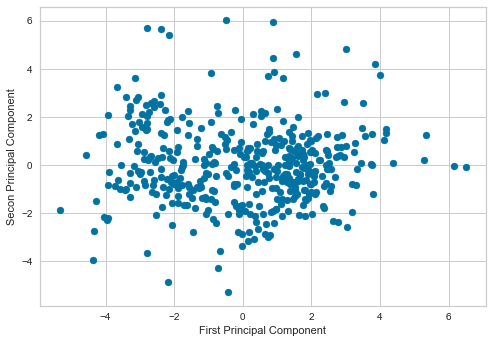

In [39]:
pca=PCA(n_components=2)
pca.fit(good_data)
reduced_data=pca.transform(good_data)
inverse_data=pca.inverse_transform(reduced_data)
plt.scatter(reduced_data[:,0],reduced_data[:,1],label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Secon Principal Component')
plt.show()

In [40]:
reduced_data=pd.DataFrame(reduced_data,columns=['Dim1','Dim2'])

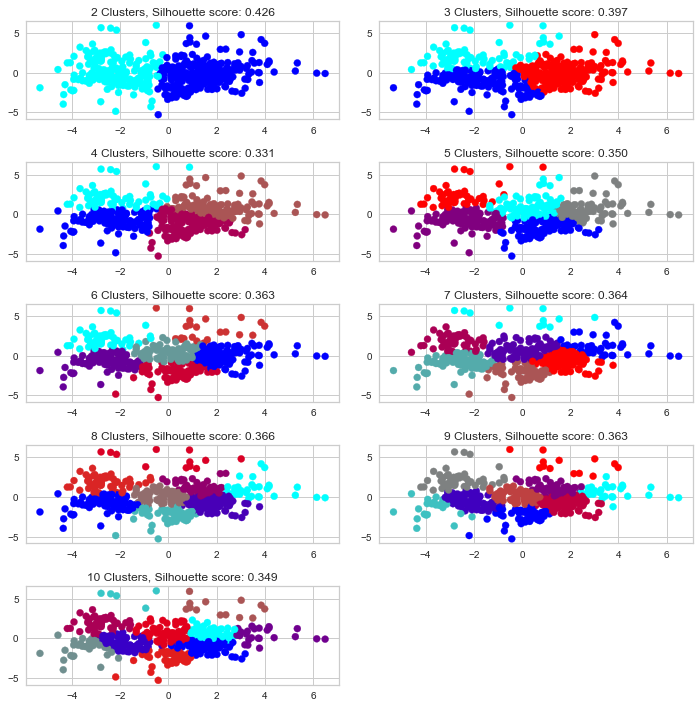

In [41]:
cmap = LinearSegmentedColormap.from_list('BlRd', ['blue', 'red', 'cyan'])
silhouette_scores = []
for i in range(2, 11):
    cl = KMeans(n_clusters=i, random_state=0)
    result = cl.fit_predict(reduced_data)
    silhouette = silhouette_score(reduced_data, result)
    silhouette_scores.append(silhouette)
    plt.subplot(5, 2, i-1)
    plt.scatter(reduced_data.Dim1.values, reduced_data.Dim2.values, c=result, cmap=cmap)
    plt.title(str(i) + ' Clusters, Silhouette score: ' + str(silhouette)[:5])
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(10, 10)
    plt.tight_layout()
plt.show()

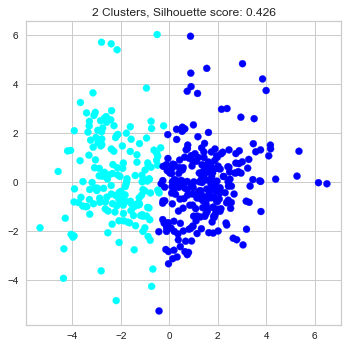

In [42]:
cl=KMeans(n_clusters=2,random_state=0)
result=cl.fit_predict(reduced_data)
silhouette=silhouette_score(reduced_data,result)
plt.clf()
plt.scatter(reduced_data.Dim1.values,reduced_data.Dim2.values,c=result,cmap=cmap)
plt.title(str(2)+' Clusters, Silhouette score: '+str(silhouette)[:5])
fig,ax=plt.gcf(),plt.gca()
fig.set_size_inches(5,5)
plt.tight_layout()
plt.show()

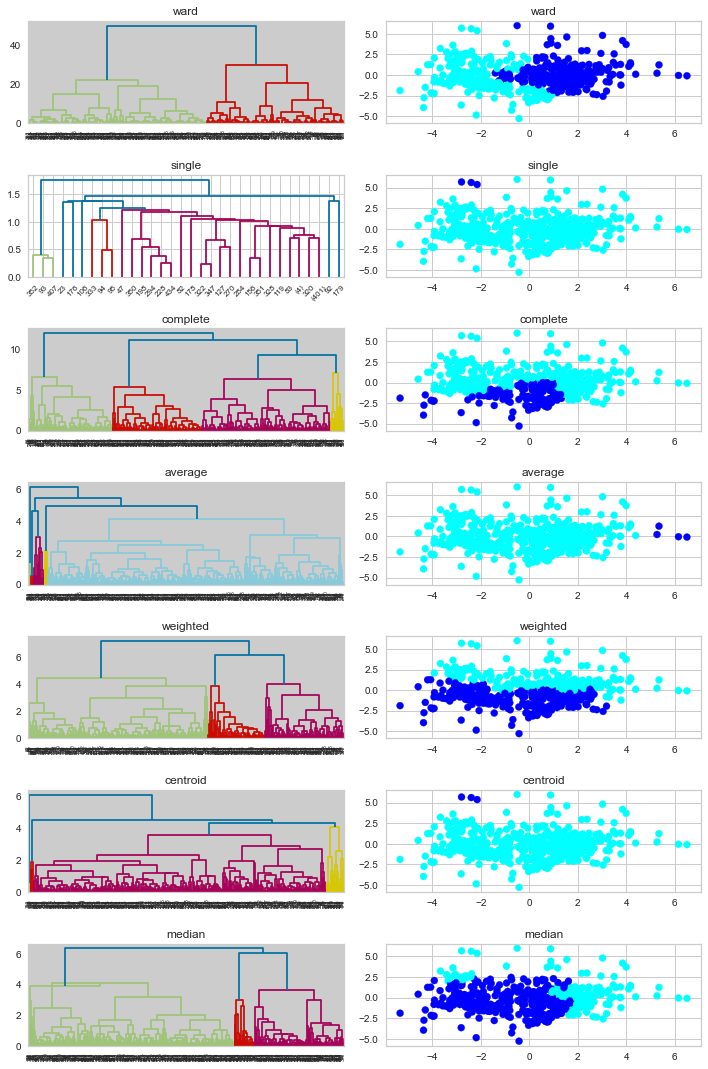

In [44]:
methods = ['ward', 'single', 'complete', 'average',
'weighted', 'centroid', 'median']
plot_id = 0
for method in methods:
    cl = linkage(reduced_data, method=method)
    for sw in ['dendrogram', 'clusters']:
        if sw == 'dendrogram':
            plot_id += 1
            plt.subplot(7, 2, plot_id)
            plt.title(method)
            fig, ax = plt.gcf(), plt.gca()
            dn = dendrogram(cl, truncate_mode='level', p=15)
            plt.tight_layout()
            fig.set_size_inches(10, 15)
        else:
            plot_id += 1
            labels = fcluster(cl, 2, criterion='maxclust')
            plt.subplot(7, 2, plot_id)
            plt.title(method)
            plt.scatter(reduced_data.Dim1.values.tolist(),
            reduced_data.Dim2.values.tolist(),
            cmap=cmap,
            c=labels
    )
plt.show()

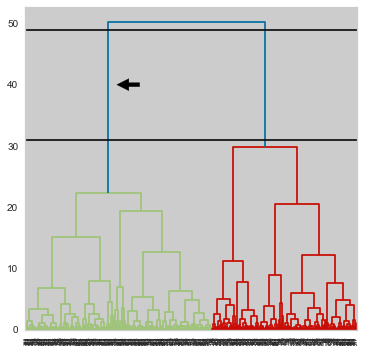

In [45]:
cl=linkage(reduced_data,method='ward')
fig,ax=plt.gcf(),plt.gca()
dn=dendrogram(cl,truncate_mode='level',p=15)
plt.tight_layout(),
fig.set_size_inches(5,5)
plt.axhline(y=31,c='k')
plt.axhline(y=49,c='k'),
ax.annotate('',xy=(1200,40),xytext=(1500,40),arrowprops={'facecolor':'black'})
plt.show()

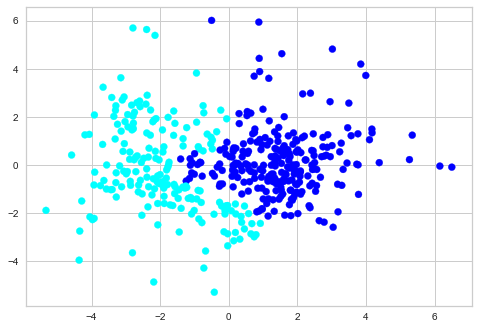

In [46]:
cl=linkage(reduced_data,method='ward')
labels=fcluster(cl,2,criterion='maxclust')
plt.scatter(reduced_data.Dim1.values.tolist(),
           reduced_data.Dim2.values.tolist(),
           cmap=cmap,
           c=labels)
plt.show()

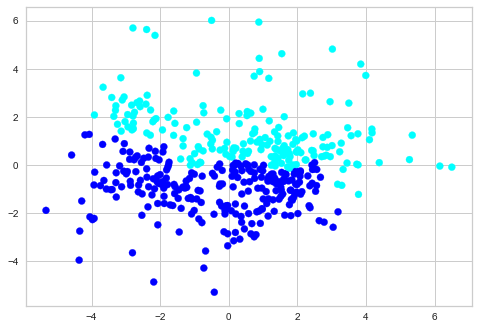

In [47]:
cl=linkage(reduced_data,method='weighted')
labels=fcluster(cl,2,criterion='maxclust')
plt.scatter(reduced_data.Dim1.values.tolist(),
           reduced_data.Dim2.values.tolist(),
           cmap=cmap,
           c=labels)
plt.show()

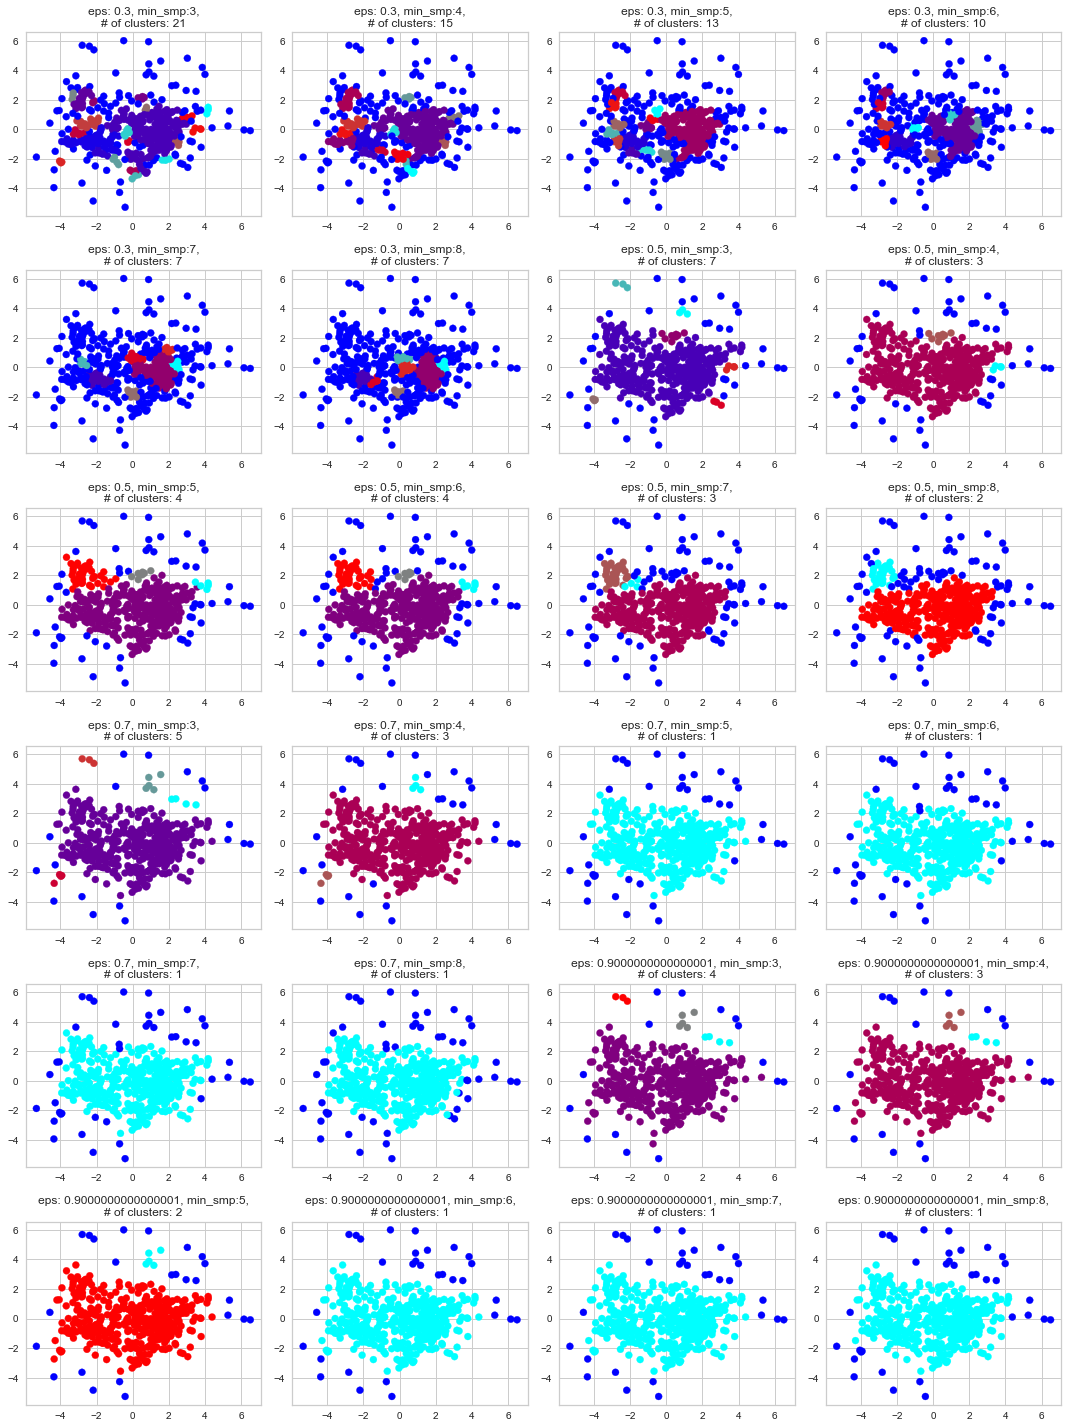

In [48]:
plot_id=0
for eps in np.arange(0.3,0.9,0.2):
    for min_samples in range(3,9):
        plot_id+=1
        cl=DBSCAN(eps=eps,min_samples=min_samples)
        result=cl.fit_predict(reduced_data)
        n_clusters=len([c for c in list(set(result)) if c!=-1])
        plt.subplot(6,4,plot_id)
        plt.scatter(reduced_data.Dim1.values.tolist(),reduced_data.Dim2.values.tolist(),
                   cmap=cmap,
                   c=result)
        
        fig,ax=plt.gcf(),plt.gca()
        fig.set_size_inches(15,20)
        plt.title('eps: '+str(eps)+\
                 ', min_smp:'+str(min_samples)+\
                 ',\n# of clusters: '+str(n_clusters))
        plt.tight_layout()
        
plt.show()

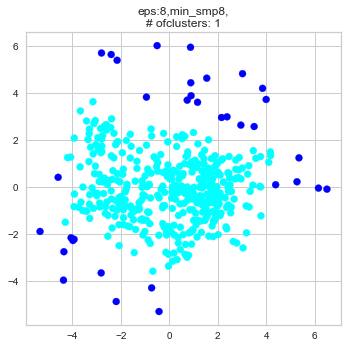

In [49]:
cl=DBSCAN(eps=0.9,min_samples=8)
result=cl.fit_predict(reduced_data)
n_clusters=len([c for c in list(set(result)) if c!=-1])
plt.scatter(reduced_data.Dim1.values.tolist(),
           reduced_data.Dim2.values.tolist(),
           cmap=cmap,
           c=result)

fig,ax=plt.gcf(),plt.gca()
fig.set_size_inches(5,5)
plt.title('eps:'+str(min_samples)+\
         ',min_smp'+str(min_samples)+\
         ',\n# ofclusters: '+str(n_clusters))
plt.tight_layout()
plt.show()